In [ ]:
pip install seaborn

## Loading the Dataset

In [38]:
# Import the libraries
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight','Acceleration', 'Model Year', 'Origin']

mpg_df = pd.read_csv(url, names=column_names, na_values ='? ', comment='\t', sep=' ', skipinitialspace=True)

In [59]:
mpg_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [60]:
mpg_df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.00,2790.0,15.6,82,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2
395,32.0,4,135.0,84.00,2295.0,11.6,82,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1
397,31.0,4,119.0,82.00,2720.0,19.4,82,1


In [61]:
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [62]:
mpg_df.shape

(398, 8)

In [63]:
# Checking number of Categories
mpg_df.Cylinders.unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [64]:
mpg_df['Model Year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [65]:
mpg_df['Origin'].unique()

array([1, 3, 2], dtype=int64)

## Cleaning and Inspecting the Data

In [66]:
mpg_df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [55]:
# Removes any rows with null values in them 
#mpg_df = mpg_df.dropna()

In [67]:
# The "Origin" column is categorical, not numeric.
# Convert categorical 'Origin' data into one-hot data
mpg_df['Origin'] = mpg_df['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
mpg_df = pd.get_dummies(mpg_df, columns=['Origin'], prefix='', prefix_sep='')

In [68]:
mpg_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True


In [72]:
mpg_df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.00,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.00,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.00,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.00,2625.0,18.6,82,False,False,True
397,31.0,4,119.0,82.00,2720.0,19.4,82,False,False,True


In [73]:
mpg_df.shape

(398, 10)

In [74]:
mpg_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
Cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
Displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
Weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
Acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
Model Year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


In [89]:
# Function to plot the comparision between MPG and other numerical features
def plot(feature):
    plt.figure(figsize=(10, 8))
    plt.scatter(mpg_df[feature], mpg_df["MPG"], label='Data')
    plt.xlabel(feature)
    plt.ylabel ('MPG')
    plt.legend()

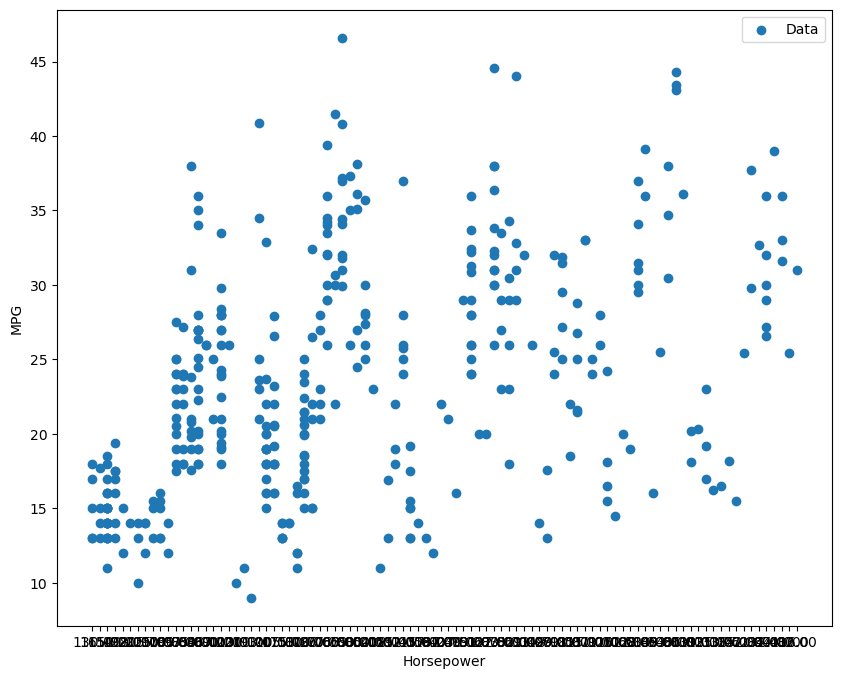

In [90]:
plot('Horsepower')

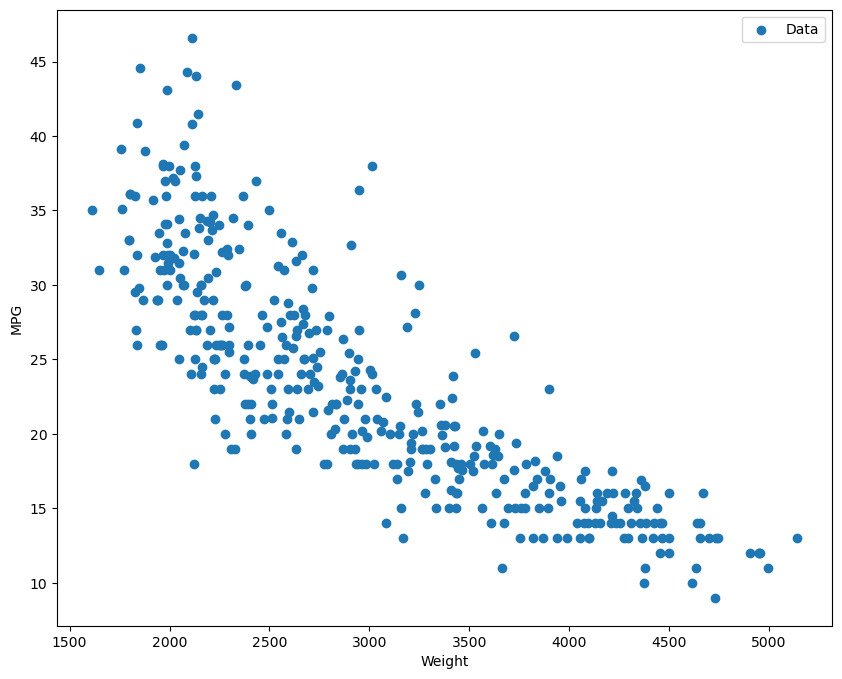

In [91]:
plot('Weight')

## Prepare the Data

In [101]:
# Input Variables or Features
input_features = mpg_df.drop('MPG', axis=1) # axis=1 indicates that a column will be dropped

# Target Variable
target = mpg_df['MPG']

In [102]:
# Import libraries for splitting dataset into train and test split
from sklearn.model_selection import train_test_split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(input_features, target, test_size=0.2, random_state=42)

In [104]:
input_features.shape, X_train.shape, X_test.shape


((398, 9), (318, 9), (80, 9))

In [110]:
# The first step is to create the Normalization layer:
normalizer = tf.keras.layers.Normalization()

# Then, fit the state of the preprocessing layer to the data by calling Normalization.adapt:
normalizer.adapt(np.array(X_train))

TypeError: unsupported operand type(s) for /: 'str' and 'int'